In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.svm import SVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler	
from sklearn.metrics import confusion_matrix

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

data = pd.read_excel (r'heat data.xlsx')
df =data.copy()
print (df)

     CAST_NO  GRADE   BLOW_DUR  MIXER_C  MIXER_MN  MIXER_S  MIXER_P  MIXER_SI  \
0     M44919    980  18.766667     4.48    0.0460   0.0590   0.1940    0.6450   
1     M44923    980  18.183333     4.48    0.0460   0.0500   0.1870    0.6790   
2     M44925    980  18.166667     4.48    0.0420   0.0780   0.1900    0.8090   
3     M44927    980  17.616667     4.48    0.0470   0.0570   0.1980    0.7550   
4     M44931    980  18.350000     4.48    0.0440   0.0640   0.1980    0.7920   
...      ...    ...        ...      ...       ...      ...      ...       ...   
8143  M60321    980  16.333333     4.65    0.0529   0.0250   0.1704    0.9286   
8144  M60325    909  16.683333     4.29    0.0438   0.0400   0.1679    0.5499   
8145  M60330    909  15.850000     4.48    0.0434   0.0368   0.1736    0.7030   
8146  M60344    980  16.850000     4.55    0.0431   0.0510   0.1573    0.6491   
8147  M60348    980  16.350000     4.62    0.0431   0.0410   0.1773    0.7617   

      MIXER_TI  HM_CHARGED 

In [3]:
df.head()

,CAST_NO,GRADE,BLOW_DUR,MIXER_C,MIXER_MN,MIXER_S,MIXER_P,MIXER_SI,MIXER_TI,HM_CHARGED,LIME,IRON_ORE,OXY,SCRAP,SCRAP_HVY_MELT,SCRAP_WRP_OH_GRADE_FINES,TD_P,TD_C
0,M44919,980,18.766667,4.48,0.046,0.059,0.194,0.645,0.0655,140.00,8.498,2.906,7897,21.10,3.10,18.0,0.010,0.042
1,M44923,980,18.183333,4.48,0.046,0.050,0.187,0.679,0.0656,140.22,8.590,3.000,7354,21.50,3.50,18.0,0.021,0.050
2,M44925,980,18.166667,4.48,0.042,0.078,0.190,0.809,0.0700,144.96,8.807,3.165,7624,20.00,0.00,20.0,0.022,0.053
3,M44927,980,17.616667,4.48,0.047,0.057,0.198,0.755,0.0729,140.00,9.000,4.500,7200,20.00,5.00,5.0,0.015,0.046
4,M44931,980,18.350000,4.48,0.044,0.064,0.198,0.792,0.0679,135.00,8.217,3.248,7230,20.97,5.97,15.0,0.019,0.054


In [4]:
df.describe()

,GRADE,BLOW_DUR,MIXER_C,MIXER_MN,MIXER_S,MIXER_P,MIXER_SI,MIXER_TI,HM_CHARGED,LIME,IRON_ORE,OXY,SCRAP,SCRAP_HVY_MELT,SCRAP_WRP_OH_GRADE_FINES,TD_P,TD_C
count,8148.000000,8148.000000,8148.000000,8138.000000,8148.000000,8138.000000,8138.00000,8138.000000,8148.000000,8148.000000,8148.000000,8148.000000,8148.000000,8148.000000,8148.000000,8148.000000,8148.000000
mean,963.814801,17.605267,4.485996,0.055506,0.044751,0.424306,0.86496,0.071089,149.679074,9.163911,5.095398,7291.111807,11.745220,4.727301,4.276667,0.019110,0.049677
std,110.438857,11.906233,0.182641,0.675929,0.015482,22.003005,9.90389,0.015795,9.645549,1.043217,2.423345,497.272627,7.367028,3.585349,4.733900,0.007956,0.052317
min,26.000000,0.150000,0.000000,-0.016400,-0.009900,-0.048700,0.00000,-0.021600,12.000000,1.016000,0.000000,1583.000000,0.000000,0.000000,0.000000,0.005000,0.019000
25%,980.000000,16.683333,4.480000,0.041400,0.037000,0.166500,0.63800,0.060400,143.887500,8.526000,3.570000,7007.750000,10.000000,0.000000,0.000000,0.014000,0.038000
50%,980.000000,17.516667,4.480000,0.046000,0.043000,0.178300,0.74300,0.070700,150.000000,9.030000,5.000000,7270.000000,15.000000,5.470000,4.000000,0.018000,0.045000
75%,980.000000,18.350000,4.520000,0.052000,0.050000,0.190000,0.86000,0.081300,155.982500,9.539000,6.651500,7581.000000,16.320000,7.192500,6.000000,0.023000,0.055000
max,1081.000000,1047.383333,5.020000,61.000000,0.550000,1985.000000,894.00000,0.210400,175.840000,15.949000,17.304000,9500.000000,23.770000,20.800000,21.950000,0.175000,4.380000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8148 entries, 0 to 8147
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CAST_NO                   8148 non-null   object 
 1   GRADE                     8148 non-null   int64  
 2   BLOW_DUR                  8148 non-null   float64
 3   MIXER_C                   8148 non-null   float64
 4   MIXER_MN                  8138 non-null   float64
 5   MIXER_S                   8148 non-null   float64
 6   MIXER_P                   8138 non-null   float64
 7   MIXER_SI                  8138 non-null   float64
 8   MIXER_TI                  8138 non-null   float64
 9   HM_CHARGED                8148 non-null   float64
 10  LIME                      8148 non-null   float64
 11  IRON_ORE                  8148 non-null   float64
 12  OXY                       8148 non-null   int64  
 13  SCRAP                     8148 non-null   float64
 14  SCRAP_HV

In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

CAST_NO                      0
GRADE                        0
BLOW_DUR                     0
MIXER_C                      0
MIXER_MN                    10
MIXER_S                      0
MIXER_P                     10
MIXER_SI                    10
MIXER_TI                    10
HM_CHARGED                   0
LIME                         0
IRON_ORE                     0
OXY                          0
SCRAP                        0
SCRAP_HVY_MELT               0
SCRAP_WRP_OH_GRADE_FINES     0
TD_P                         0
TD_C                         0
dtype: int64

In [8]:
df.head()


,CAST_NO,GRADE,BLOW_DUR,MIXER_C,MIXER_MN,MIXER_S,MIXER_P,MIXER_SI,MIXER_TI,HM_CHARGED,LIME,IRON_ORE,OXY,SCRAP,SCRAP_HVY_MELT,SCRAP_WRP_OH_GRADE_FINES,TD_P,TD_C
0,M44919,980,18.766667,4.48,0.046,0.059,0.194,0.645,0.0655,140.00,8.498,2.906,7897,21.10,3.10,18.0,0.010,0.042
1,M44923,980,18.183333,4.48,0.046,0.050,0.187,0.679,0.0656,140.22,8.590,3.000,7354,21.50,3.50,18.0,0.021,0.050
2,M44925,980,18.166667,4.48,0.042,0.078,0.190,0.809,0.0700,144.96,8.807,3.165,7624,20.00,0.00,20.0,0.022,0.053
3,M44927,980,17.616667,4.48,0.047,0.057,0.198,0.755,0.0729,140.00,9.000,4.500,7200,20.00,5.00,5.0,0.015,0.046
4,M44931,980,18.350000,4.48,0.044,0.064,0.198,0.792,0.0679,135.00,8.217,3.248,7230,20.97,5.97,15.0,0.019,0.054


In [9]:
df

,CAST_NO,GRADE,BLOW_DUR,MIXER_C,MIXER_MN,MIXER_S,MIXER_P,MIXER_SI,MIXER_TI,HM_CHARGED,LIME,IRON_ORE,OXY,SCRAP,SCRAP_HVY_MELT,SCRAP_WRP_OH_GRADE_FINES,TD_P,TD_C
0,M44919,980,18.766667,4.48,0.0460,0.0590,0.1940,0.6450,0.0655,140.00,8.498,2.906,7897,21.10,3.10,18.0,0.010,0.042
1,M44923,980,18.183333,4.48,0.0460,0.0500,0.1870,0.6790,0.0656,140.22,8.590,3.000,7354,21.50,3.50,18.0,0.021,0.050
2,M44925,980,18.166667,4.48,0.0420,0.0780,0.1900,0.8090,0.0700,144.96,8.807,3.165,7624,20.00,0.00,20.0,0.022,0.053
3,M44927,980,17.616667,4.48,0.0470,0.0570,0.1980,0.7550,0.0729,140.00,9.000,4.500,7200,20.00,5.00,5.0,0.015,0.046
4,M44931,980,18.350000,4.48,0.0440,0.0640,0.1980,0.7920,0.0679,135.00,8.217,3.248,7230,20.97,5.97,15.0,0.019,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8143,M60321,980,16.333333,4.65,0.0529,0.0250,0.1704,0.9286,0.0995,144.15,8.187,7.589,7188,15.16,5.16,5.0,0.015,0.052
8144,M60325,909,16.683333,4.29,0.0438,0.0400,0.1679,0.5499,0.0634,146.63,8.773,5.846,7540,15.81,5.81,5.0,0.020,0.048
8145,M60330,909,15.850000,4.48,0.0434,0.0368,0.1736,0.7030,0.0709,152.37,8.629,8.269,6724,0.00,0.00,0.0,0.016,0.057
8146,M60344,980,16.850000,4.55,0.0431,0.0510,0.1573,0.6491,0.0631,158.69,10.217,11.905,7234,0.00,0.00,0.0,0.020,0.074


In [10]:
df=df.drop('TD_P',axis=1)

In [11]:
df=df.drop('TD_C',axis=1)

In [12]:
df=df.drop('CAST_NO',axis=1)

In [13]:
df

,GRADE,BLOW_DUR,MIXER_C,MIXER_MN,MIXER_S,MIXER_P,MIXER_SI,MIXER_TI,HM_CHARGED,LIME,IRON_ORE,OXY,SCRAP,SCRAP_HVY_MELT,SCRAP_WRP_OH_GRADE_FINES
0,980,18.766667,4.48,0.0460,0.0590,0.1940,0.6450,0.0655,140.00,8.498,2.906,7897,21.10,3.10,18.0
1,980,18.183333,4.48,0.0460,0.0500,0.1870,0.6790,0.0656,140.22,8.590,3.000,7354,21.50,3.50,18.0
2,980,18.166667,4.48,0.0420,0.0780,0.1900,0.8090,0.0700,144.96,8.807,3.165,7624,20.00,0.00,20.0
3,980,17.616667,4.48,0.0470,0.0570,0.1980,0.7550,0.0729,140.00,9.000,4.500,7200,20.00,5.00,5.0
4,980,18.350000,4.48,0.0440,0.0640,0.1980,0.7920,0.0679,135.00,8.217,3.248,7230,20.97,5.97,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8143,980,16.333333,4.65,0.0529,0.0250,0.1704,0.9286,0.0995,144.15,8.187,7.589,7188,15.16,5.16,5.0
8144,909,16.683333,4.29,0.0438,0.0400,0.1679,0.5499,0.0634,146.63,8.773,5.846,7540,15.81,5.81,5.0
8145,909,15.850000,4.48,0.0434,0.0368,0.1736,0.7030,0.0709,152.37,8.629,8.269,6724,0.00,0.00,0.0
8146,980,16.850000,4.55,0.0431,0.0510,0.1573,0.6491,0.0631,158.69,10.217,11.905,7234,0.00,0.00,0.0


In [14]:
df.dtypes


GRADE                         int64
BLOW_DUR                    float64
MIXER_C                     float64
MIXER_MN                    float64
MIXER_S                     float64
MIXER_P                     float64
MIXER_SI                    float64
MIXER_TI                    float64
HM_CHARGED                  float64
LIME                        float64
IRON_ORE                    float64
OXY                           int64
SCRAP                       float64
SCRAP_HVY_MELT              float64
SCRAP_WRP_OH_GRADE_FINES    float64
dtype: object

In [17]:
df["MIXER_MN"].fillna(df["MIXER_MN"].median(), inplace=True)
df["MIXER_P"].fillna(df["MIXER_P"].median(), inplace=True)
df["MIXER_SI"].fillna(df["MIXER_SI"].median(), inplace=True)
df["MIXER_TI"].fillna(df["MIXER_TI"].median(), inplace=True)

In [16]:
df.isnull().sum()
df.shape

(8148, 15)

In [59]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

GRADE                         0.000000
BLOW_DUR                      1.666667
MIXER_C                       0.040000
MIXER_MN                      0.010600
MIXER_S                       0.013000
MIXER_P                       0.023500
MIXER_SI                      0.222000
MIXER_TI                      0.020900
HM_CHARGED                   12.095000
LIME                          1.013000
IRON_ORE                      3.081500
OXY                         573.250000
SCRAP                         6.320000
SCRAP_HVY_MELT                7.192500
SCRAP_WRP_OH_GRADE_FINES      6.000000
TD_P                          0.009000
TD_C                          0.017000
dtype: float64


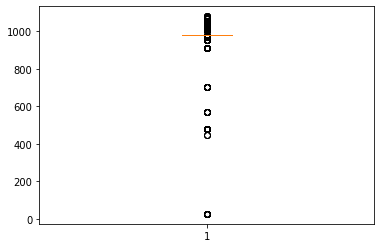

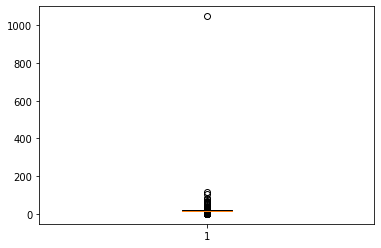

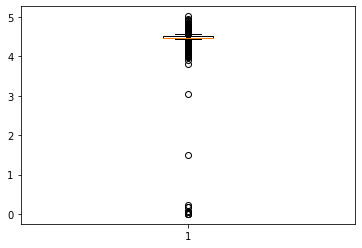

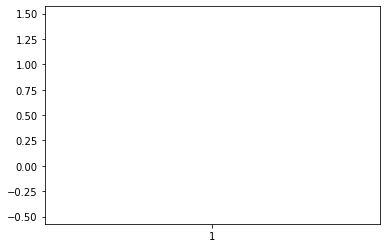

In [61]:

plt.boxplot(data['GRADE'])
plt.show()
plt.boxplot(data['BLOW_DUR'])
plt.show()
plt.boxplot(data['MIXER_C'])
plt.show()
plt.boxplot(data['MIXER_MN'])
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)

print ("The shape of Feature Matrix is -",X_std.shape)

The shape of Feature Matrix is - (8148, 15)


In [63]:
#We will use the approach of finding the outliers on the basis of interquantile range
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

GRADE                         0.000000
BLOW_DUR                      1.666667
MIXER_C                       0.040000
MIXER_MN                      0.010600
MIXER_S                       0.013000
MIXER_P                       0.023500
MIXER_SI                      0.222000
MIXER_TI                      0.020900
HM_CHARGED                   12.095000
LIME                          1.013000
IRON_ORE                      3.081500
OXY                         573.250000
SCRAP                         6.320000
SCRAP_HVY_MELT                7.192500
SCRAP_WRP_OH_GRADE_FINES      6.000000
TD_P                          0.009000
TD_C                          0.017000
dtype: float64


In [64]:
#This dataset is without outliers which we removed by using the following.
dfi = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
dfi

,CAST_NO,GRADE,BLOW_DUR,MIXER_C,MIXER_MN,MIXER_S,MIXER_P,MIXER_SI,MIXER_TI,HM_CHARGED,LIME,IRON_ORE,OXY,SCRAP,SCRAP_HVY_MELT,SCRAP_WRP_OH_GRADE_FINES,TD_P,TD_C
0,M44919,980,18.766667,4.48,0.0460,0.0590,0.1940,0.6450,0.0655,140.00,8.498,2.906,7897,21.10,3.10,18.0,0.010,0.042
1,M44923,980,18.183333,4.48,0.0460,0.0500,0.1870,0.6790,0.0656,140.22,8.590,3.000,7354,21.50,3.50,18.0,0.021,0.050
2,M44925,980,18.166667,4.48,0.0420,0.0780,0.1900,0.8090,0.0700,144.96,8.807,3.165,7624,20.00,0.00,20.0,0.022,0.053
6,M44935,1019,19.016667,4.48,0.0430,0.0440,0.1560,0.5950,0.0594,143.03,8.294,2.488,7467,20.63,5.63,15.0,0.017,0.080
9,M44940,980,16.900000,4.48,0.0420,0.0530,0.2000,0.5530,0.0517,166.86,8.548,5.696,7088,0.00,0.00,0.0,0.016,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8143,M60321,980,16.333333,4.65,0.0529,0.0250,0.1704,0.9286,0.0995,144.15,8.187,7.589,7188,15.16,5.16,5.0,0.015,0.052
8144,M60325,909,16.683333,4.29,0.0438,0.0400,0.1679,0.5499,0.0634,146.63,8.773,5.846,7540,15.81,5.81,5.0,0.020,0.048
8145,M60330,909,15.850000,4.48,0.0434,0.0368,0.1736,0.7030,0.0709,152.37,8.629,8.269,6724,0.00,0.00,0.0,0.016,0.057
8146,M60344,980,16.850000,4.55,0.0431,0.0510,0.1573,0.6491,0.0631,158.69,10.217,11.905,7234,0.00,0.00,0.0,0.020,0.074


In [65]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6443 entries, 0 to 8147
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CAST_NO                   6443 non-null   object 
 1   GRADE                     6443 non-null   int64  
 2   BLOW_DUR                  6443 non-null   float64
 3   MIXER_C                   6443 non-null   float64
 4   MIXER_MN                  6434 non-null   float64
 5   MIXER_S                   6443 non-null   float64
 6   MIXER_P                   6434 non-null   float64
 7   MIXER_SI                  6434 non-null   float64
 8   MIXER_TI                  6434 non-null   float64
 9   HM_CHARGED                6443 non-null   float64
 10  LIME                      6443 non-null   float64
 11  IRON_ORE                  6443 non-null   float64
 12  OXY                       6443 non-null   int64  
 13  SCRAP                     6443 non-null   float64
 14  SCRAP_HV

In [66]:
#For treating the null values,we will fill the null values with median.
dfi["MIXER_MN"].fillna(dfi["MIXER_MN"].median(), inplace=True)
dfi["MIXER_P"].fillna(dfi["MIXER_P"].median(), inplace=True)
dfi["MIXER_SI"].fillna(dfi["MIXER_SI"].median(), inplace=True)
dfi["MIXER_TI"].fillna(dfi["MIXER_TI"].median(), inplace=True)

In [67]:
df=dfi.drop('TD_P',axis=1)
df=dfi.drop('TD_C',axis=1)
df=dfi.drop('CAST_NO',axis=1)
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)

print ("The shape of Feature Matrix is -",X_std.shape)

The shape of Feature Matrix is - (6443, 17)


In [68]:
X=X_std
y=dfi['TD_P']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)

In [26]:
pca=PCA(n_components=12)
pca.fit(X_std)
x_pca=pca.transform(X_std)
x_pca.shape

(8148, 12)

In [28]:
X=x_pca
y=data['TD_C']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
                         

In [70]:
#Applying the Random forest regression along with hyperparameter tuning using RandomsearchCV. Below are the hypermaters that can be used for traing from which the best ones are to be chosen.from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor()
grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
                          scoring='r2')
grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)


0.9505867817784918
{'n_estimators': 10, 'max_features': 8}


In [71]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
best_random = grid_search
random_accuracy = evaluate(best_random, X_train,y_train)

Model Performance
Average Error: 0.0001 degrees.
Accuracy = 99.29%.


In [72]:
#Checking with XGBRegressor algorithm
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 10,
                        n_jobs = 5,
                        verbose=0)

xgb_grid.fit(X_train,
         y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'm

In [73]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.07,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [74]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
best_random = xgb_grid.best_estimator_
random_accuracy = evaluate(best_random, X_train,y_train)
y_pred = best_random.predict(X_test)
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2: %.2f" % r2 )

Model Performance
Average Error: 0.0001 degrees.
Accuracy = 99.69%.
R2: 1.00


In [75]:
#Checking with the Ridge regression algorithm
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# load the diabetes datasets

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
best_random = grid.best_estimator_
random_accuracy = evaluate(best_random, X_train,y_train)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


In [ ]:
#Checking these models, we can say that might be there can be an overfitting therefor we will consider RandomforestRegressor with the score 0.9505.